# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

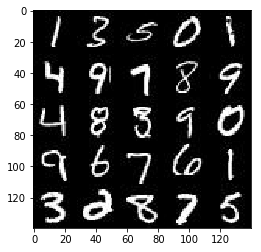

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

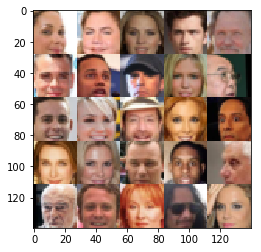

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/home/aind2/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate_placeholder = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate_placeholder


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):        
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    # name variable scope 'discriminator' for building GAN model
    with tf.variable_scope('discriminator', reuse=reuse):
        # input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        
        x4 = tf.layers.conv2d(relu3, 512, 5, strides=1, padding='same')
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        # 4x4x516

        # Flatten it
        flat = tf.reshape(relu4, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # first fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # reshape it to start convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 5, strides=1, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        # 28x28x64
        
        x5 = tf.layers.conv2d_transpose(x4, 32, 5, strides=1, padding='same')
        x5 = tf.layers.batch_normalization(x5, training=is_train)
        x5 = tf.maximum(alpha * x5, x5)
        # 28x28x32
                
        # Output layer
        logits = tf.layers.conv2d_transpose(x5, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
                
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [18]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    tf.reset_default_graph()
    
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, learning_rate_placeholder = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    print_every = 10
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, 
                                               input_z: batch_z, 
                                               learning_rate_placeholder: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, 
                                               input_z: batch_z, 
                                               learning_rate_placeholder: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, 
                                                input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.7061... Generator Loss: 8.6380
Epoch 1/2... Discriminator Loss: 0.7054... Generator Loss: 1.9002
Epoch 1/2... Discriminator Loss: 0.5869... Generator Loss: 4.4468
Epoch 1/2... Discriminator Loss: 5.6877... Generator Loss: 0.0226
Epoch 1/2... Discriminator Loss: 1.2672... Generator Loss: 3.2188
Epoch 1/2... Discriminator Loss: 1.9770... Generator Loss: 0.4418
Epoch 1/2... Discriminator Loss: 2.0902... Generator Loss: 2.0163
Epoch 1/2... Discriminator Loss: 1.3154... Generator Loss: 0.7228
Epoch 1/2... Discriminator Loss: 1.5697... Generator Loss: 0.4742
Epoch 1/2... Discriminator Loss: 1.1983... Generator Loss: 0.8966


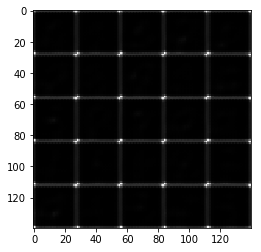

Epoch 1/2... Discriminator Loss: 2.3298... Generator Loss: 0.2068
Epoch 1/2... Discriminator Loss: 1.4638... Generator Loss: 0.5096
Epoch 1/2... Discriminator Loss: 1.6749... Generator Loss: 0.3884
Epoch 1/2... Discriminator Loss: 1.6442... Generator Loss: 0.4179
Epoch 1/2... Discriminator Loss: 1.6877... Generator Loss: 0.3782
Epoch 1/2... Discriminator Loss: 1.2647... Generator Loss: 1.1833
Epoch 1/2... Discriminator Loss: 1.4241... Generator Loss: 2.3281
Epoch 1/2... Discriminator Loss: 1.4093... Generator Loss: 0.5384
Epoch 1/2... Discriminator Loss: 1.2134... Generator Loss: 0.7829
Epoch 1/2... Discriminator Loss: 1.1718... Generator Loss: 1.0034


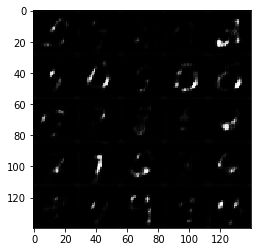

Epoch 1/2... Discriminator Loss: 1.4286... Generator Loss: 1.0729
Epoch 1/2... Discriminator Loss: 1.4051... Generator Loss: 1.6501
Epoch 1/2... Discriminator Loss: 1.1420... Generator Loss: 1.0328
Epoch 1/2... Discriminator Loss: 2.0151... Generator Loss: 2.6336
Epoch 1/2... Discriminator Loss: 1.6952... Generator Loss: 0.3626
Epoch 1/2... Discriminator Loss: 1.3199... Generator Loss: 0.6241
Epoch 1/2... Discriminator Loss: 1.4800... Generator Loss: 0.4809
Epoch 1/2... Discriminator Loss: 1.1902... Generator Loss: 0.8489
Epoch 1/2... Discriminator Loss: 1.2416... Generator Loss: 0.6586
Epoch 1/2... Discriminator Loss: 1.4191... Generator Loss: 1.7892


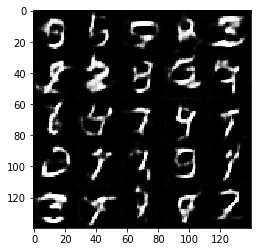

Epoch 1/2... Discriminator Loss: 1.3758... Generator Loss: 1.3031
Epoch 1/2... Discriminator Loss: 1.2647... Generator Loss: 1.5314
Epoch 1/2... Discriminator Loss: 1.4740... Generator Loss: 1.5128
Epoch 1/2... Discriminator Loss: 1.1492... Generator Loss: 1.0312
Epoch 1/2... Discriminator Loss: 1.4411... Generator Loss: 1.7978
Epoch 1/2... Discriminator Loss: 1.0962... Generator Loss: 1.2130
Epoch 1/2... Discriminator Loss: 1.2255... Generator Loss: 0.7940
Epoch 1/2... Discriminator Loss: 1.1421... Generator Loss: 0.9443
Epoch 1/2... Discriminator Loss: 1.2618... Generator Loss: 1.4459
Epoch 1/2... Discriminator Loss: 1.0982... Generator Loss: 1.3214


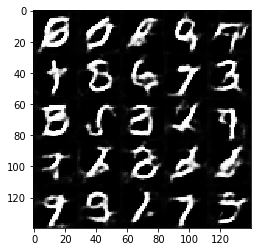

Epoch 1/2... Discriminator Loss: 1.4081... Generator Loss: 1.2755
Epoch 1/2... Discriminator Loss: 1.6162... Generator Loss: 0.4209
Epoch 1/2... Discriminator Loss: 1.2294... Generator Loss: 0.7021
Epoch 1/2... Discriminator Loss: 1.2743... Generator Loss: 0.6667
Epoch 1/2... Discriminator Loss: 1.4715... Generator Loss: 0.5666
Epoch 1/2... Discriminator Loss: 1.7466... Generator Loss: 2.1367
Epoch 2/2... Discriminator Loss: 1.4069... Generator Loss: 1.5478
Epoch 2/2... Discriminator Loss: 1.2500... Generator Loss: 1.3654
Epoch 2/2... Discriminator Loss: 1.2372... Generator Loss: 0.9734
Epoch 2/2... Discriminator Loss: 1.4281... Generator Loss: 0.5633


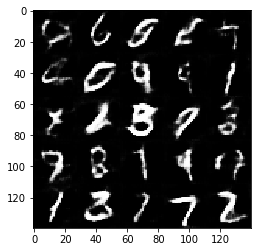

Epoch 2/2... Discriminator Loss: 1.1922... Generator Loss: 1.6253
Epoch 2/2... Discriminator Loss: 1.3719... Generator Loss: 1.5592
Epoch 2/2... Discriminator Loss: 1.5649... Generator Loss: 2.3057
Epoch 2/2... Discriminator Loss: 1.3083... Generator Loss: 1.2510
Epoch 2/2... Discriminator Loss: 1.2843... Generator Loss: 0.8085
Epoch 2/2... Discriminator Loss: 1.7986... Generator Loss: 0.3673
Epoch 2/2... Discriminator Loss: 1.3192... Generator Loss: 0.6300
Epoch 2/2... Discriminator Loss: 1.1329... Generator Loss: 1.2943
Epoch 2/2... Discriminator Loss: 1.5233... Generator Loss: 2.0418
Epoch 2/2... Discriminator Loss: 1.2667... Generator Loss: 0.9096


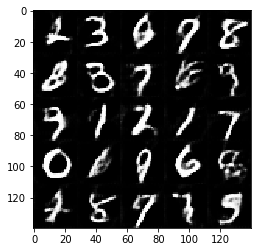

Epoch 2/2... Discriminator Loss: 1.5853... Generator Loss: 2.0544
Epoch 2/2... Discriminator Loss: 1.1485... Generator Loss: 1.0920
Epoch 2/2... Discriminator Loss: 1.3077... Generator Loss: 1.2299
Epoch 2/2... Discriminator Loss: 1.2875... Generator Loss: 1.3066
Epoch 2/2... Discriminator Loss: 1.3237... Generator Loss: 1.3094
Epoch 2/2... Discriminator Loss: 1.2581... Generator Loss: 1.2154
Epoch 2/2... Discriminator Loss: 1.3681... Generator Loss: 1.2805
Epoch 2/2... Discriminator Loss: 1.2776... Generator Loss: 0.8377
Epoch 2/2... Discriminator Loss: 1.3583... Generator Loss: 0.5775
Epoch 2/2... Discriminator Loss: 1.3353... Generator Loss: 1.6127


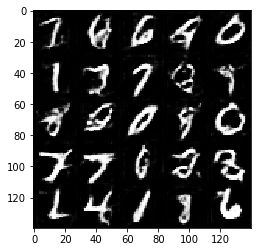

Epoch 2/2... Discriminator Loss: 1.4138... Generator Loss: 0.5139
Epoch 2/2... Discriminator Loss: 1.3036... Generator Loss: 1.4431
Epoch 2/2... Discriminator Loss: 1.4278... Generator Loss: 1.0402
Epoch 2/2... Discriminator Loss: 1.4703... Generator Loss: 1.6834
Epoch 2/2... Discriminator Loss: 1.2661... Generator Loss: 0.8031
Epoch 2/2... Discriminator Loss: 1.5042... Generator Loss: 0.5041
Epoch 2/2... Discriminator Loss: 1.6388... Generator Loss: 0.3902
Epoch 2/2... Discriminator Loss: 1.5939... Generator Loss: 1.7246
Epoch 2/2... Discriminator Loss: 1.3535... Generator Loss: 0.5821
Epoch 2/2... Discriminator Loss: 1.3398... Generator Loss: 1.5180


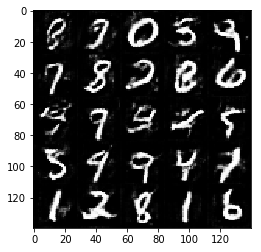

Epoch 2/2... Discriminator Loss: 1.3451... Generator Loss: 0.6286
Epoch 2/2... Discriminator Loss: 1.2124... Generator Loss: 0.7061
Epoch 2/2... Discriminator Loss: 1.7364... Generator Loss: 0.3468
Epoch 2/2... Discriminator Loss: 1.4303... Generator Loss: 0.9005
Epoch 2/2... Discriminator Loss: 1.2013... Generator Loss: 1.0277
Epoch 2/2... Discriminator Loss: 1.3121... Generator Loss: 0.7300
Epoch 2/2... Discriminator Loss: 1.4445... Generator Loss: 0.5157
Epoch 2/2... Discriminator Loss: 1.5680... Generator Loss: 0.5234
Epoch 2/2... Discriminator Loss: 1.2195... Generator Loss: 0.8504
Epoch 2/2... Discriminator Loss: 1.2346... Generator Loss: 1.0822


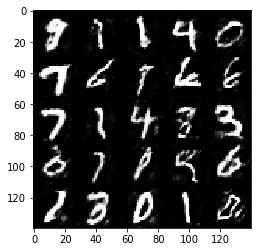

Epoch 2/2... Discriminator Loss: 1.5189... Generator Loss: 0.5012
Epoch 2/2... Discriminator Loss: 1.3983... Generator Loss: 0.6907
Epoch 2/2... Discriminator Loss: 1.3009... Generator Loss: 1.3450


IndexError: list index out of range

In [20]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.5609... Generator Loss: 4.8234
Epoch 1/1... Discriminator Loss: 1.5621... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 5.6314... Generator Loss: 0.0441
Epoch 1/1... Discriminator Loss: 1.5490... Generator Loss: 0.5084
Epoch 1/1... Discriminator Loss: 0.7372... Generator Loss: 2.0325
Epoch 1/1... Discriminator Loss: 1.0430... Generator Loss: 1.4779
Epoch 1/1... Discriminator Loss: 1.4688... Generator Loss: 0.5674
Epoch 1/1... Discriminator Loss: 1.8444... Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 1.2591... Generator Loss: 1.3561
Epoch 1/1... Discriminator Loss: 1.3942... Generator Loss: 1.1727


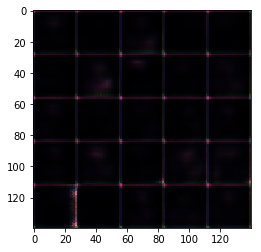

Epoch 1/1... Discriminator Loss: 1.7942... Generator Loss: 0.6637
Epoch 1/1... Discriminator Loss: 2.1858... Generator Loss: 2.6531
Epoch 1/1... Discriminator Loss: 1.7767... Generator Loss: 1.2798
Epoch 1/1... Discriminator Loss: 1.6654... Generator Loss: 1.1443
Epoch 1/1... Discriminator Loss: 1.2721... Generator Loss: 0.9259
Epoch 1/1... Discriminator Loss: 1.4736... Generator Loss: 1.2130
Epoch 1/1... Discriminator Loss: 1.2601... Generator Loss: 1.0011
Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 0.9017
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.7784
Epoch 1/1... Discriminator Loss: 0.9404... Generator Loss: 1.1065


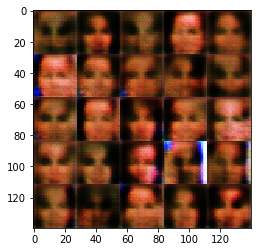

Epoch 1/1... Discriminator Loss: 1.2691... Generator Loss: 1.2836
Epoch 1/1... Discriminator Loss: 1.1999... Generator Loss: 0.8900
Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 1.1439
Epoch 1/1... Discriminator Loss: 1.5485... Generator Loss: 1.5528
Epoch 1/1... Discriminator Loss: 1.4757... Generator Loss: 0.5240
Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.6663
Epoch 1/1... Discriminator Loss: 1.2703... Generator Loss: 1.0418
Epoch 1/1... Discriminator Loss: 0.7876... Generator Loss: 1.2427
Epoch 1/1... Discriminator Loss: 1.4618... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 2.0975... Generator Loss: 0.3694


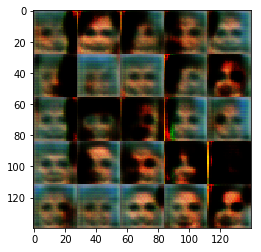

Epoch 1/1... Discriminator Loss: 1.2589... Generator Loss: 0.8819
Epoch 1/1... Discriminator Loss: 1.2965... Generator Loss: 0.9242
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.9372
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 0.7517
Epoch 1/1... Discriminator Loss: 1.4990... Generator Loss: 0.9765
Epoch 1/1... Discriminator Loss: 1.4608... Generator Loss: 0.6587
Epoch 1/1... Discriminator Loss: 1.4834... Generator Loss: 0.8539
Epoch 1/1... Discriminator Loss: 1.2922... Generator Loss: 0.7252
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.6041
Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.7199


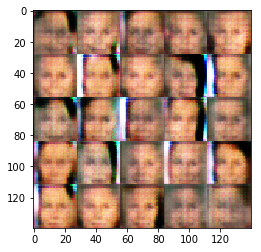

Epoch 1/1... Discriminator Loss: 1.4288... Generator Loss: 1.1997
Epoch 1/1... Discriminator Loss: 1.1530... Generator Loss: 0.7926
Epoch 1/1... Discriminator Loss: 1.6911... Generator Loss: 0.7110
Epoch 1/1... Discriminator Loss: 1.5297... Generator Loss: 0.9925
Epoch 1/1... Discriminator Loss: 1.6222... Generator Loss: 0.5169
Epoch 1/1... Discriminator Loss: 1.0732... Generator Loss: 1.0539
Epoch 1/1... Discriminator Loss: 1.2463... Generator Loss: 1.0703
Epoch 1/1... Discriminator Loss: 1.4980... Generator Loss: 0.5887
Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 1.2503
Epoch 1/1... Discriminator Loss: 1.4645... Generator Loss: 0.9871


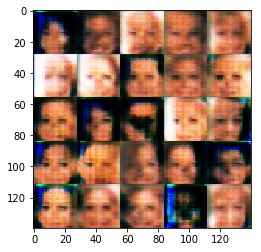

Epoch 1/1... Discriminator Loss: 1.3320... Generator Loss: 1.1203
Epoch 1/1... Discriminator Loss: 0.7522... Generator Loss: 1.2154
Epoch 1/1... Discriminator Loss: 1.3313... Generator Loss: 0.7143
Epoch 1/1... Discriminator Loss: 1.2958... Generator Loss: 0.6965
Epoch 1/1... Discriminator Loss: 1.5537... Generator Loss: 1.2048
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 0.6907
Epoch 1/1... Discriminator Loss: 1.3414... Generator Loss: 1.2953
Epoch 1/1... Discriminator Loss: 1.2889... Generator Loss: 0.9385
Epoch 1/1... Discriminator Loss: 1.6623... Generator Loss: 0.8014
Epoch 1/1... Discriminator Loss: 1.2370... Generator Loss: 0.9104


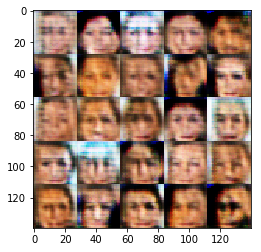

Epoch 1/1... Discriminator Loss: 1.6646... Generator Loss: 1.2803
Epoch 1/1... Discriminator Loss: 0.9735... Generator Loss: 0.9128
Epoch 1/1... Discriminator Loss: 1.2623... Generator Loss: 0.9948
Epoch 1/1... Discriminator Loss: 1.4926... Generator Loss: 1.1166
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.7448
Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 1.2939
Epoch 1/1... Discriminator Loss: 1.4345... Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.2844... Generator Loss: 0.9921
Epoch 1/1... Discriminator Loss: 1.5730... Generator Loss: 0.5124
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 1.1125


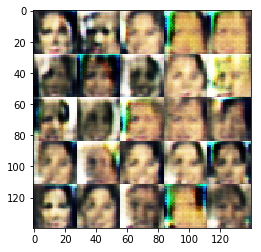

Epoch 1/1... Discriminator Loss: 1.1104... Generator Loss: 0.9042
Epoch 1/1... Discriminator Loss: 1.4617... Generator Loss: 0.5290
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 0.9406
Epoch 1/1... Discriminator Loss: 1.5251... Generator Loss: 1.8439
Epoch 1/1... Discriminator Loss: 1.1534... Generator Loss: 1.5866
Epoch 1/1... Discriminator Loss: 1.1743... Generator Loss: 0.9653
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.9194
Epoch 1/1... Discriminator Loss: 1.3291... Generator Loss: 0.9484
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 0.8553


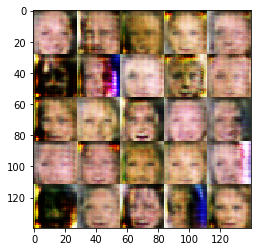

Epoch 1/1... Discriminator Loss: 1.3506... Generator Loss: 1.1704
Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.4444... Generator Loss: 1.3284
Epoch 1/1... Discriminator Loss: 1.2366... Generator Loss: 0.9301
Epoch 1/1... Discriminator Loss: 1.5761... Generator Loss: 0.6361
Epoch 1/1... Discriminator Loss: 1.5060... Generator Loss: 1.5595
Epoch 1/1... Discriminator Loss: 1.1269... Generator Loss: 1.0595
Epoch 1/1... Discriminator Loss: 1.0334... Generator Loss: 0.9886
Epoch 1/1... Discriminator Loss: 1.9554... Generator Loss: 0.3637
Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 0.7282


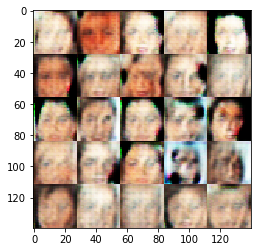

Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 1.5714... Generator Loss: 1.7513
Epoch 1/1... Discriminator Loss: 1.4630... Generator Loss: 0.6470
Epoch 1/1... Discriminator Loss: 1.4520... Generator Loss: 1.5006
Epoch 1/1... Discriminator Loss: 1.2193... Generator Loss: 0.8025
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 1.1846
Epoch 1/1... Discriminator Loss: 1.4536... Generator Loss: 0.6083
Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 1.0588
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.5623
Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 1.0180


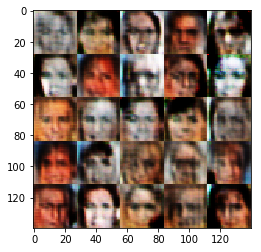

Epoch 1/1... Discriminator Loss: 1.0416... Generator Loss: 0.7888
Epoch 1/1... Discriminator Loss: 0.8492... Generator Loss: 1.3599
Epoch 1/1... Discriminator Loss: 1.0956... Generator Loss: 1.0379
Epoch 1/1... Discriminator Loss: 1.6225... Generator Loss: 0.6035
Epoch 1/1... Discriminator Loss: 1.1633... Generator Loss: 0.7177
Epoch 1/1... Discriminator Loss: 1.3201... Generator Loss: 0.7829
Epoch 1/1... Discriminator Loss: 1.2466... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 1.0051
Epoch 1/1... Discriminator Loss: 1.2293... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 1.6003... Generator Loss: 0.5831


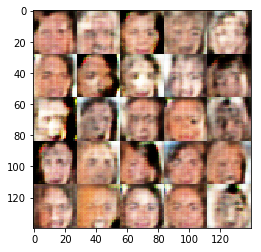

Epoch 1/1... Discriminator Loss: 1.4671... Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.2629... Generator Loss: 1.0231
Epoch 1/1... Discriminator Loss: 1.3147... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.3188... Generator Loss: 0.8608
Epoch 1/1... Discriminator Loss: 1.2756... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 1.3136... Generator Loss: 0.7873
Epoch 1/1... Discriminator Loss: 1.3208... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.6798
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.7669
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.7457


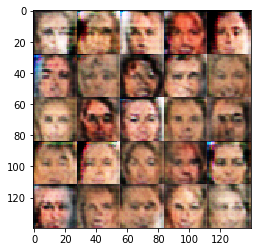

Epoch 1/1... Discriminator Loss: 1.4599... Generator Loss: 0.6372
Epoch 1/1... Discriminator Loss: 1.3323... Generator Loss: 0.5443
Epoch 1/1... Discriminator Loss: 1.3019... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.4545... Generator Loss: 0.7533
Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.5651
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.6443
Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 0.8640
Epoch 1/1... Discriminator Loss: 1.3851... Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.3194... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.4560... Generator Loss: 0.5303


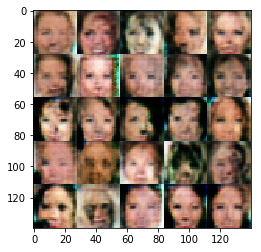

Epoch 1/1... Discriminator Loss: 1.5967... Generator Loss: 0.7142
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.5281... Generator Loss: 1.0922
Epoch 1/1... Discriminator Loss: 1.5413... Generator Loss: 0.8930
Epoch 1/1... Discriminator Loss: 1.3250... Generator Loss: 0.7385
Epoch 1/1... Discriminator Loss: 1.2899... Generator Loss: 0.8547
Epoch 1/1... Discriminator Loss: 1.3323... Generator Loss: 0.9427
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.7774
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 0.9029
Epoch 1/1... Discriminator Loss: 1.2756... Generator Loss: 0.8721


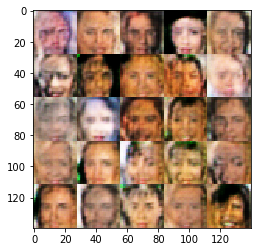

Epoch 1/1... Discriminator Loss: 1.4826... Generator Loss: 1.2300
Epoch 1/1... Discriminator Loss: 1.3470... Generator Loss: 0.9976
Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.7189
Epoch 1/1... Discriminator Loss: 1.3465... Generator Loss: 0.9028
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.8164
Epoch 1/1... Discriminator Loss: 1.3404... Generator Loss: 1.1170
Epoch 1/1... Discriminator Loss: 1.3015... Generator Loss: 0.9261
Epoch 1/1... Discriminator Loss: 1.3436... Generator Loss: 0.7320
Epoch 1/1... Discriminator Loss: 1.3610... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 1.3788... Generator Loss: 0.6475


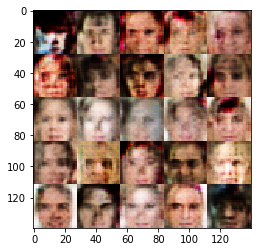

Epoch 1/1... Discriminator Loss: 1.5091... Generator Loss: 0.8512
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.8111
Epoch 1/1... Discriminator Loss: 1.3231... Generator Loss: 0.8989
Epoch 1/1... Discriminator Loss: 1.3322... Generator Loss: 0.8556
Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 1.0480
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 0.7489
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.8980


IndexError: list index out of range

In [21]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.